# Real Estate Price Prediction - Ahmedabad Real Data Training 🏠🇮🇳

## Overview
This notebook trains machine learning models on **real Ahmedabad property data** from the provided CSV file. The dataset contains actual property listings with prices in Indian Rupees.

### Dataset Information
- **Source**: Real Ahmedabad property listings
- **Size**: 6,855+ properties
- **Currency**: Indian Rupees (₹)
- **Areas**: Vastrapur, Bopal, Shela, Satellite, Maninagar, and more
- **Features**: BHK, area, location, price, furnishing, status

---

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Import our custom data processor
import sys
sys.path.append('../src')
from real_data_processor import RealDataProcessor

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🏠 Ready to process real Ahmedabad property data!")

✅ All libraries imported successfully!
🏠 Ready to process real Ahmedabad property data!


In [2]:
# Load and Process Real Ahmedabad Data
print("🏠 Loading Real Ahmedabad Property Data...")

# Load the real dataset
df_raw = pd.read_csv('../data/ahmedabad.csv')
print(f"✅ Loaded {len(df_raw)} real properties from CSV")

# Display raw data info
print("\n📊 Raw Dataset Info:")
print(f"Shape: {df_raw.shape}")
print(f"Columns: {list(df_raw.columns)}")

# Show sample raw data
print("\n🔍 Sample Raw Data:")
print(df_raw.head())

# Check for missing values
print("\n❓ Missing Values:")
print(df_raw.isnull().sum())

🏠 Loading Real Ahmedabad Property Data...
✅ Loaded 6853 real properties from CSV

📊 Raw Dataset Info:
Shape: (6853, 12)
Columns: ['Unnamed: 0', 'Title', 'type_area', 'value_area', 'status', 'floor', 'transaction', 'furnishing', 'facing', 'price', 'price_sqft', 'description']

🔍 Sample Raw Data:
   Unnamed: 0                                              Title    type_area  \
0           0  2 BHK Apartment for Sale in Vivaan Aura, Zunda...   Super Area   
1           1  2 BHK Apartment for Sale in SP Epitome, Shela ...  Carpet Area   
2           2  2 BHK Apartment for Sale in Pacifica Amara, Sa...  Carpet Area   
3           3  2 BHK Apartment for Sale in Kavisha AER, Shela...  Carpet Area   
4           4  2 BHK Apartment for Sale in Aarambh Vistara, G...  Carpet Area   

  value_area            status         floor  transaction       furnishing  \
0  155 sqyrd  Poss. by Dec '26  New Property  Unfurnished      Vivaan Aura   
1   710 sqft  Poss. by Jun '27  New Property  Unfurnished    

In [3]:
# Process the Real Data
print("🔧 Processing real Ahmedabad property data...")

# Initialize processor
processor = RealDataProcessor()

# Process the raw data
df = processor.process_real_ahmedabad_data(df_raw)

print(f"\n📊 Processed dataset shape: {df.shape}")
print(f"💰 Price range: ₹{df['price'].min():,.0f} - ₹{df['price'].max():,.0f}")
print(f"🏘️ Areas covered: {', '.join(df['neighborhood'].unique()[:8])}...")

# Display processed data info
print("\n🔍 Processed Data Sample:")
print(df[['price', 'bedrooms', 'square_feet', 'neighborhood', 'property_type']].head(10))

# Basic statistics
print("\n📈 Basic Statistics:")
print(df[['price', 'bedrooms', 'bathrooms', 'square_feet', 'property_age']].describe())

🔧 Processing real Ahmedabad property data...
🔧 Processing real Ahmedabad property data...
✅ Processed 2836 properties successfully
📊 Features: ['Unnamed: 0', 'Title', 'type_area', 'value_area', 'status', 'floor', 'transaction', 'furnishing', 'facing', 'price', 'price_sqft', 'description', 'bedrooms', 'property_type', 'square_feet', 'neighborhood', 'latitude', 'longitude', 'bathrooms', 'year_built', 'property_age', 'price_per_sqft', 'is_furnished', 'is_semi_furnished', 'is_resale', 'floor_number', 'garage', 'pool', 'fireplace', 'lot_size']

📊 Processed dataset shape: (2836, 30)
💰 Price range: ₹700,000 - ₹10,000,000
🏘️ Areas covered: Zundal, Shela, Sanand, Gota, Jagatpur, Bopal, Other, Ghuma...

🔍 Processed Data Sample:
       price  bedrooms  square_feet neighborhood property_type
0  4810000.0       2.0       1395.0       Zundal     Apartment
1  5000000.0       2.0        710.0        Shela     Apartment
2  4000000.0       2.0        588.0       Sanand     Apartment
3  4880000.0       2

📊 Performing Exploratory Data Analysis...


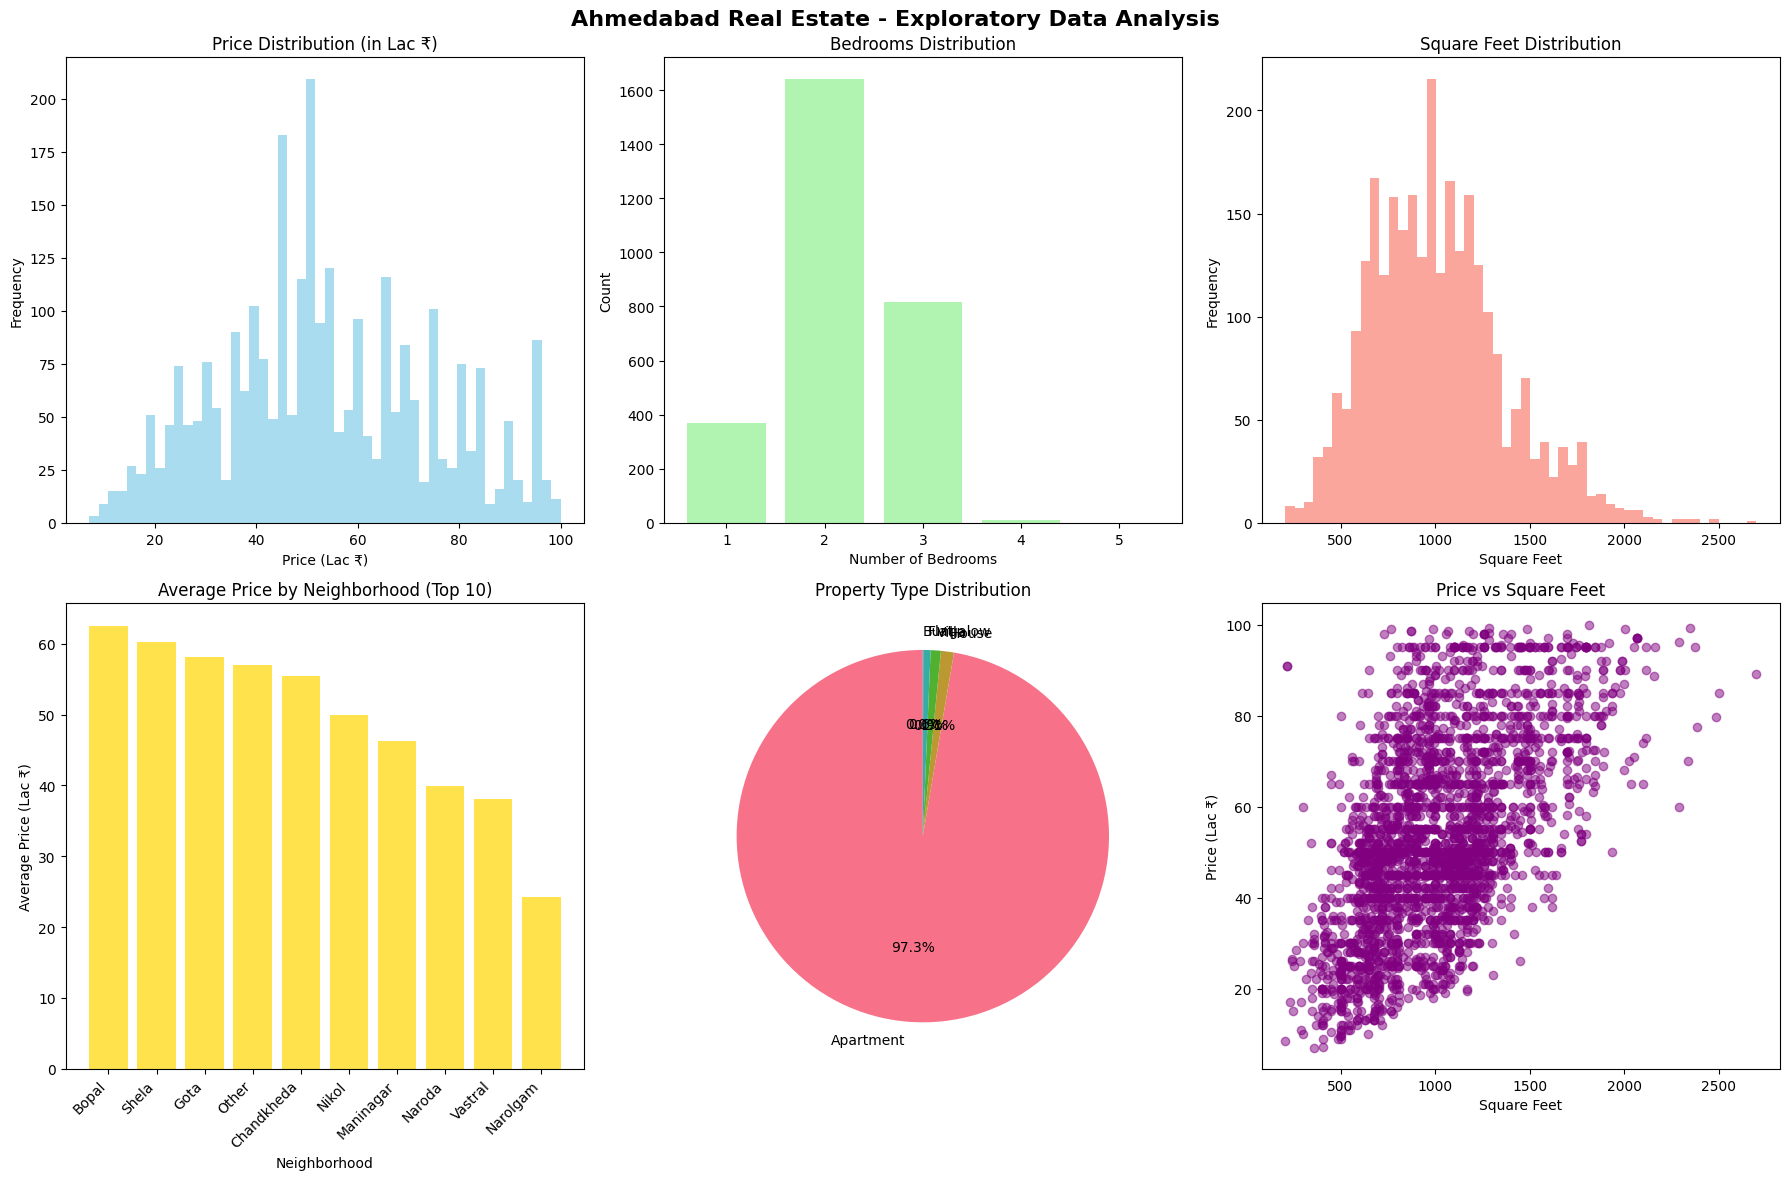


🔍 Key Insights:
   💰 Average price: ₹5,349,429 (53.5 Lac)
   🏠 Most common: 2 BHK properties
   📐 Average size: 1016 sq ft
   🏘️ Most expensive area: Bopal
   🏗️ Most common type: Apartment


In [4]:
# Exploratory Data Analysis
print("📊 Performing Exploratory Data Analysis...")

# Create subplots for EDA
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Ahmedabad Real Estate - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Price distribution
axes[0, 0].hist(df['price']/100000, bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Price Distribution (in Lac ₹)')
axes[0, 0].set_xlabel('Price (Lac ₹)')
axes[0, 0].set_ylabel('Frequency')

# Bedrooms distribution
bedroom_counts = df['bedrooms'].value_counts().sort_index()
axes[0, 1].bar(bedroom_counts.index, bedroom_counts.values, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Bedrooms Distribution')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Count')

# Square feet distribution
axes[0, 2].hist(df['square_feet'], bins=50, alpha=0.7, color='salmon')
axes[0, 2].set_title('Square Feet Distribution')
axes[0, 2].set_xlabel('Square Feet')
axes[0, 2].set_ylabel('Frequency')

# Price by neighborhood (top 10)
top_neighborhoods = df['neighborhood'].value_counts().head(10).index
neighborhood_prices = df[df['neighborhood'].isin(top_neighborhoods)].groupby('neighborhood')['price'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(neighborhood_prices)), neighborhood_prices.values/100000, alpha=0.7, color='gold')
axes[1, 0].set_title('Average Price by Neighborhood (Top 10)')
axes[1, 0].set_xlabel('Neighborhood')
axes[1, 0].set_ylabel('Average Price (Lac ₹)')
axes[1, 0].set_xticks(range(len(neighborhood_prices)))
axes[1, 0].set_xticklabels(neighborhood_prices.index, rotation=45, ha='right')

# Property type distribution
prop_type_counts = df['property_type'].value_counts()
axes[1, 1].pie(prop_type_counts.values, labels=prop_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Property Type Distribution')

# Price vs Square Feet scatter
axes[1, 2].scatter(df['square_feet'], df['price']/100000, alpha=0.5, color='purple')
axes[1, 2].set_title('Price vs Square Feet')
axes[1, 2].set_xlabel('Square Feet')
axes[1, 2].set_ylabel('Price (Lac ₹)')

plt.tight_layout()
plt.show()

# Print key insights
print(f"\n🔍 Key Insights:")
print(f"   💰 Average price: ₹{df['price'].mean():,.0f} ({df['price'].mean()/100000:.1f} Lac)")
print(f"   🏠 Most common: {df['bedrooms'].mode()[0]:.0f} BHK properties")
print(f"   📐 Average size: {df['square_feet'].mean():.0f} sq ft")
print(f"   🏘️ Most expensive area: {neighborhood_prices.index[0]}")
print(f"   🏗️ Most common type: {df['property_type'].mode()[0]}")

In [5]:
# Prepare Data for Machine Learning
print("🤖 Preparing data for machine learning...")

# Prepare features
X, y = processor.prepare_features_for_ml(df)
print(f"✅ Features prepared: {X.shape[1]} features, {len(X)} samples")
print(f"📊 Feature columns: {list(X.columns)}")

# Split the data
X_train, X_test, y_train, y_test = processor.create_train_test_split(X, y, test_size=0.1, random_state=42)
print(f"\n📊 Data split:")
print(f"   🎯 Training set: {len(X_train)} samples")
print(f"   🧪 Test set: {len(X_test)} samples")

# Scale features for some algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data preprocessing complete!")
print(f"   💰 Training price range: ₹{y_train.min():,.0f} - ₹{y_train.max():,.0f}")
print(f"   🎯 Test price range: ₹{y_test.min():,.0f} - ₹{y_test.max():,.0f}")

🤖 Preparing data for machine learning...
✅ Features prepared: 17 features
Features: ['bedrooms', 'bathrooms', 'square_feet', 'lot_size', 'year_built', 'property_age', 'floor_number', 'garage', 'pool', 'fireplace', 'is_furnished', 'is_semi_furnished', 'is_resale', 'latitude', 'longitude', 'neighborhood_encoded', 'property_type_encoded']
✅ Features prepared: 17 features, 2836 samples
📊 Feature columns: ['bedrooms', 'bathrooms', 'square_feet', 'lot_size', 'year_built', 'property_age', 'floor_number', 'garage', 'pool', 'fireplace', 'is_furnished', 'is_semi_furnished', 'is_resale', 'latitude', 'longitude', 'neighborhood_encoded', 'property_type_encoded']

📊 Data split:
   🎯 Training set: 2552 samples
   🧪 Test set: 284 samples

✅ Data preprocessing complete!
   💰 Training price range: ₹700,000 - ₹10,000,000
   🎯 Test price range: ₹1,100,000 - ₹9,850,000


In [6]:
# Train Multiple ML Models
print("🤖 Training Multiple ML Models on Real Ahmedabad Data...")
print("="*60)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Store results
results = {}

# Train and evaluate all models
for name, model in models.items():
    print(f"\n🤖 Training {name}...")
    
    # Use scaled data for SVR and linear models
    if name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_mape': test_mape,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model
    }
    
    print(f"   📊 Train R²: {train_r2:.4f}")
    print(f"   📈 Test R²: {test_r2:.4f}")
    print(f"   💰 Test MAE: ₹{test_mae:,.0f} ({test_mae/100000:.1f} Lac)")
    print(f"   📊 Test MAPE: {test_mape:.1f}%")
    print(f"   🎯 CV Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print(f"\n✅ All models trained successfully!")

🤖 Training Multiple ML Models on Real Ahmedabad Data...

🤖 Training Linear Regression...
   📊 Train R²: 0.5681
   📈 Test R²: 0.6476
   💰 Test MAE: ₹1,029,557 (10.3 Lac)
   📊 Test MAPE: 24.0%
   🎯 CV Score: 0.5623 ± 0.0160

🤖 Training Ridge Regression...
   📊 Train R²: 0.5681
   📈 Test R²: 0.6476
   💰 Test MAE: ₹1,029,682 (10.3 Lac)
   📊 Test MAPE: 24.0%
   🎯 CV Score: 0.5623 ± 0.0160

🤖 Training Lasso Regression...
   📊 Train R²: 0.5681
   📈 Test R²: 0.6476
   💰 Test MAE: ₹1,029,557 (10.3 Lac)
   📊 Test MAPE: 24.0%
   🎯 CV Score: 0.5623 ± 0.0160

🤖 Training Random Forest...
   📊 Train R²: 0.9490
   📈 Test R²: 0.6801
   💰 Test MAE: ₹945,448 (9.5 Lac)
   📊 Test MAPE: 21.3%
   🎯 CV Score: 0.6229 ± 0.0196

🤖 Training Gradient Boosting...
   📊 Train R²: 0.7095
   📈 Test R²: 0.7130
   💰 Test MAE: ₹900,068 (9.0 Lac)
   📊 Test MAPE: 19.4%
   🎯 CV Score: 0.6450 ± 0.0141

🤖 Training Support Vector Regression...
   📊 Train R²: -0.0283
   📈 Test R²: -0.0247
   💰 Test MAE: ₹1,792,394 (17.9 Lac)
   

📊 Model Performance Analysis...

🏆 Model Performance Ranking:
                       Model  Test_R2      Test_MAE     Test_RMSE  Test_MAPE  \
4          Gradient Boosting   0.7130  9.000677e+05  1.170237e+06    19.4265   
3              Random Forest   0.6801  9.454475e+05  1.235390e+06    21.2912   
0          Linear Regression   0.6476  1.029557e+06  1.296684e+06    23.9961   
2           Lasso Regression   0.6476  1.029557e+06  1.296684e+06    23.9961   
1           Ridge Regression   0.6476  1.029682e+06  1.296785e+06    23.9990   
5  Support Vector Regression  -0.0247  1.792394e+06  2.211184e+06    45.5059   

   CV_Mean  CV_Std  
4   0.6450  0.0141  
3   0.6229  0.0196  
0   0.5623  0.0160  
2   0.5623  0.0160  
1   0.5623  0.0160  
5  -0.0278  0.0135  

🥇 Best Model: Gradient Boosting
   📈 Test R²: 0.7130
   💰 Test MAE: ₹900,068
   📊 Test MAPE: 19.4%


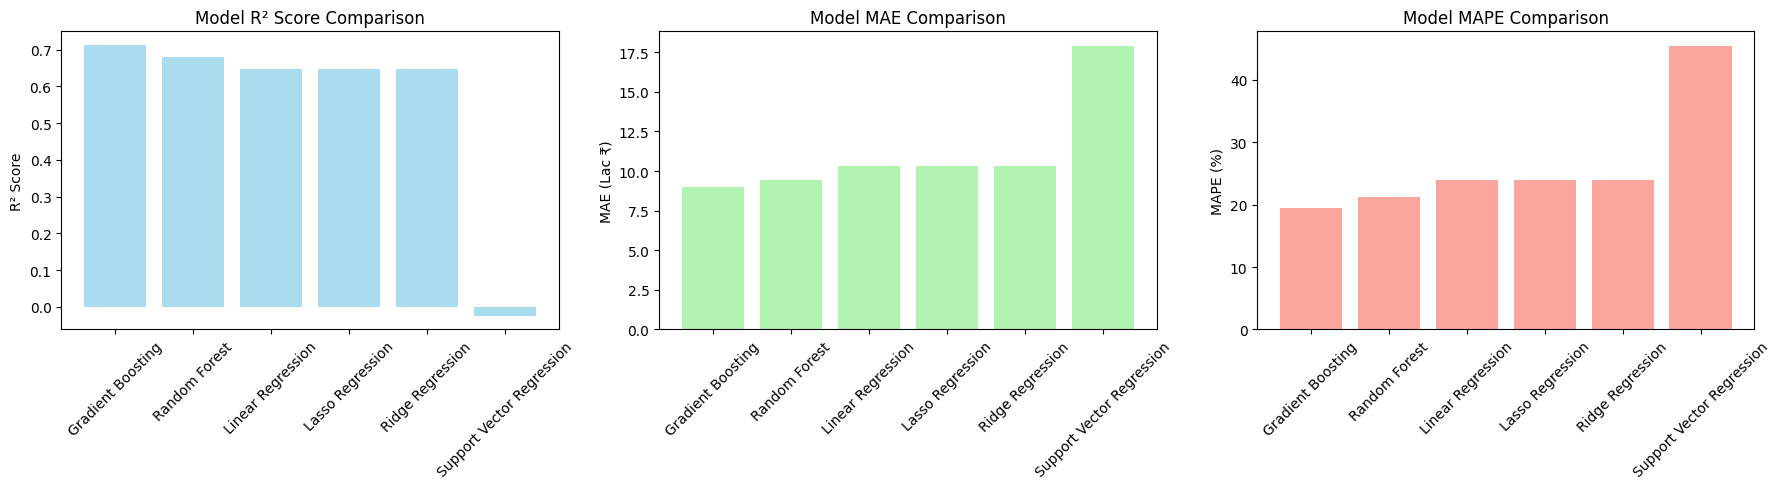

In [7]:
# Model Performance Comparison and Analysis
print("📊 Model Performance Analysis...")

# Create performance comparison DataFrame
performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test_R2': [results[name]['test_r2'] for name in results.keys()],
    'Test_MAE': [results[name]['test_mae'] for name in results.keys()],
    'Test_RMSE': [results[name]['test_rmse'] for name in results.keys()],
    'Test_MAPE': [results[name]['test_mape'] for name in results.keys()],
    'CV_Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV_Std': [results[name]['cv_std'] for name in results.keys()]
})

performance_df = performance_df.sort_values('Test_R2', ascending=False)
print("\n🏆 Model Performance Ranking:")
print(performance_df.round(4))

# Find best model
best_model_name = performance_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\n🥇 Best Model: {best_model_name}")
print(f"   📈 Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"   💰 Test MAE: ₹{results[best_model_name]['test_mae']:,.0f}")
print(f"   📊 Test MAPE: {results[best_model_name]['test_mape']:.1f}%")

# Visualize model performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
axes[0].bar(performance_df['Model'], performance_df['Test_R2'], alpha=0.7, color='skyblue')
axes[0].set_title('Model R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1].bar(performance_df['Model'], performance_df['Test_MAE']/100000, alpha=0.7, color='lightgreen')
axes[1].set_title('Model MAE Comparison')
axes[1].set_ylabel('MAE (Lac ₹)')
axes[1].tick_params(axis='x', rotation=45)

# MAPE comparison
axes[2].bar(performance_df['Model'], performance_df['Test_MAPE'], alpha=0.7, color='salmon')
axes[2].set_title('Model MAPE Comparison')
axes[2].set_ylabel('MAPE (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

🔍 Feature Importance Analysis...

🔍 Top 15 Most Important Features (Gradient Boosting):
                  feature  importance
0                bedrooms    0.560364
1               bathrooms    0.146050
2             square_feet    0.096870
15   neighborhood_encoded    0.066088
14              longitude    0.047981
13               latitude    0.027240
6            floor_number    0.016218
3                lot_size    0.007737
10           is_furnished    0.007558
11      is_semi_furnished    0.007395
12              is_resale    0.006541
4              year_built    0.004677
5            property_age    0.001914
16  property_type_encoded    0.001653
7                  garage    0.001108


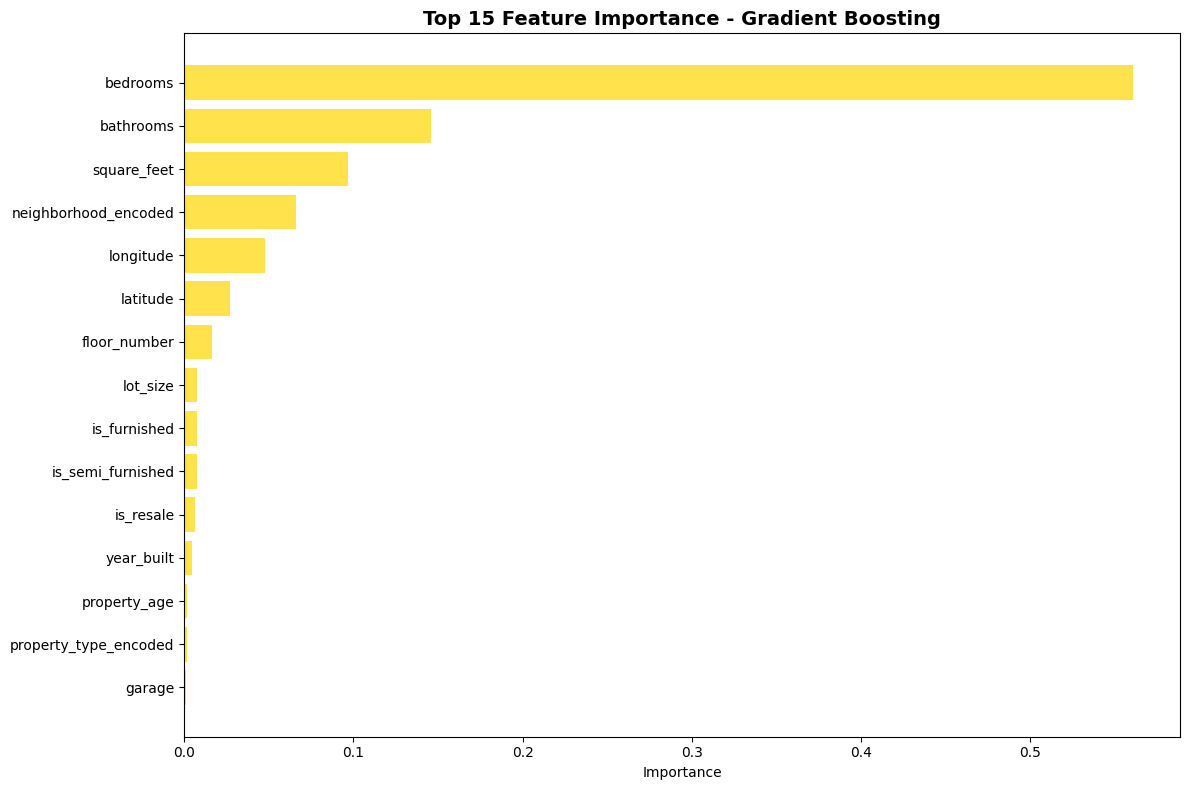


💡 Key Insights:
   🥇 Most important: bedrooms (0.560)
   🥈 Second most: bathrooms (0.146)
   🥉 Third most: square_feet (0.097)


In [8]:
# Feature Importance Analysis
print("🔍 Feature Importance Analysis...")

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🔍 Top 15 Most Important Features ({best_model_name}):")
    print(feature_importance.head(15))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['feature'], top_features['importance'], alpha=0.7, color='gold')
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Feature importance insights
    print(f"\n💡 Key Insights:")
    print(f"   🥇 Most important: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.3f})")
    print(f"   🥈 Second most: {feature_importance.iloc[1]['feature']} ({feature_importance.iloc[1]['importance']:.3f})")
    print(f"   🥉 Third most: {feature_importance.iloc[2]['feature']} ({feature_importance.iloc[2]['importance']:.3f})")

else:
    print(f"\n⚠️ Feature importance not available for {best_model_name}")
    
    # For linear models, show coefficients
    if hasattr(best_model, 'coef_'):
        coef_importance = pd.DataFrame({
            'feature': X.columns,
            'coefficient': best_model.coef_
        })
        coef_importance['abs_coefficient'] = np.abs(coef_importance['coefficient'])
        coef_importance = coef_importance.sort_values('abs_coefficient', ascending=False)
        
        print(f"\n📊 Top 10 Features by Coefficient Magnitude ({best_model_name}):")
        print(coef_importance.head(10))

📊 Visualizing Model Predictions...


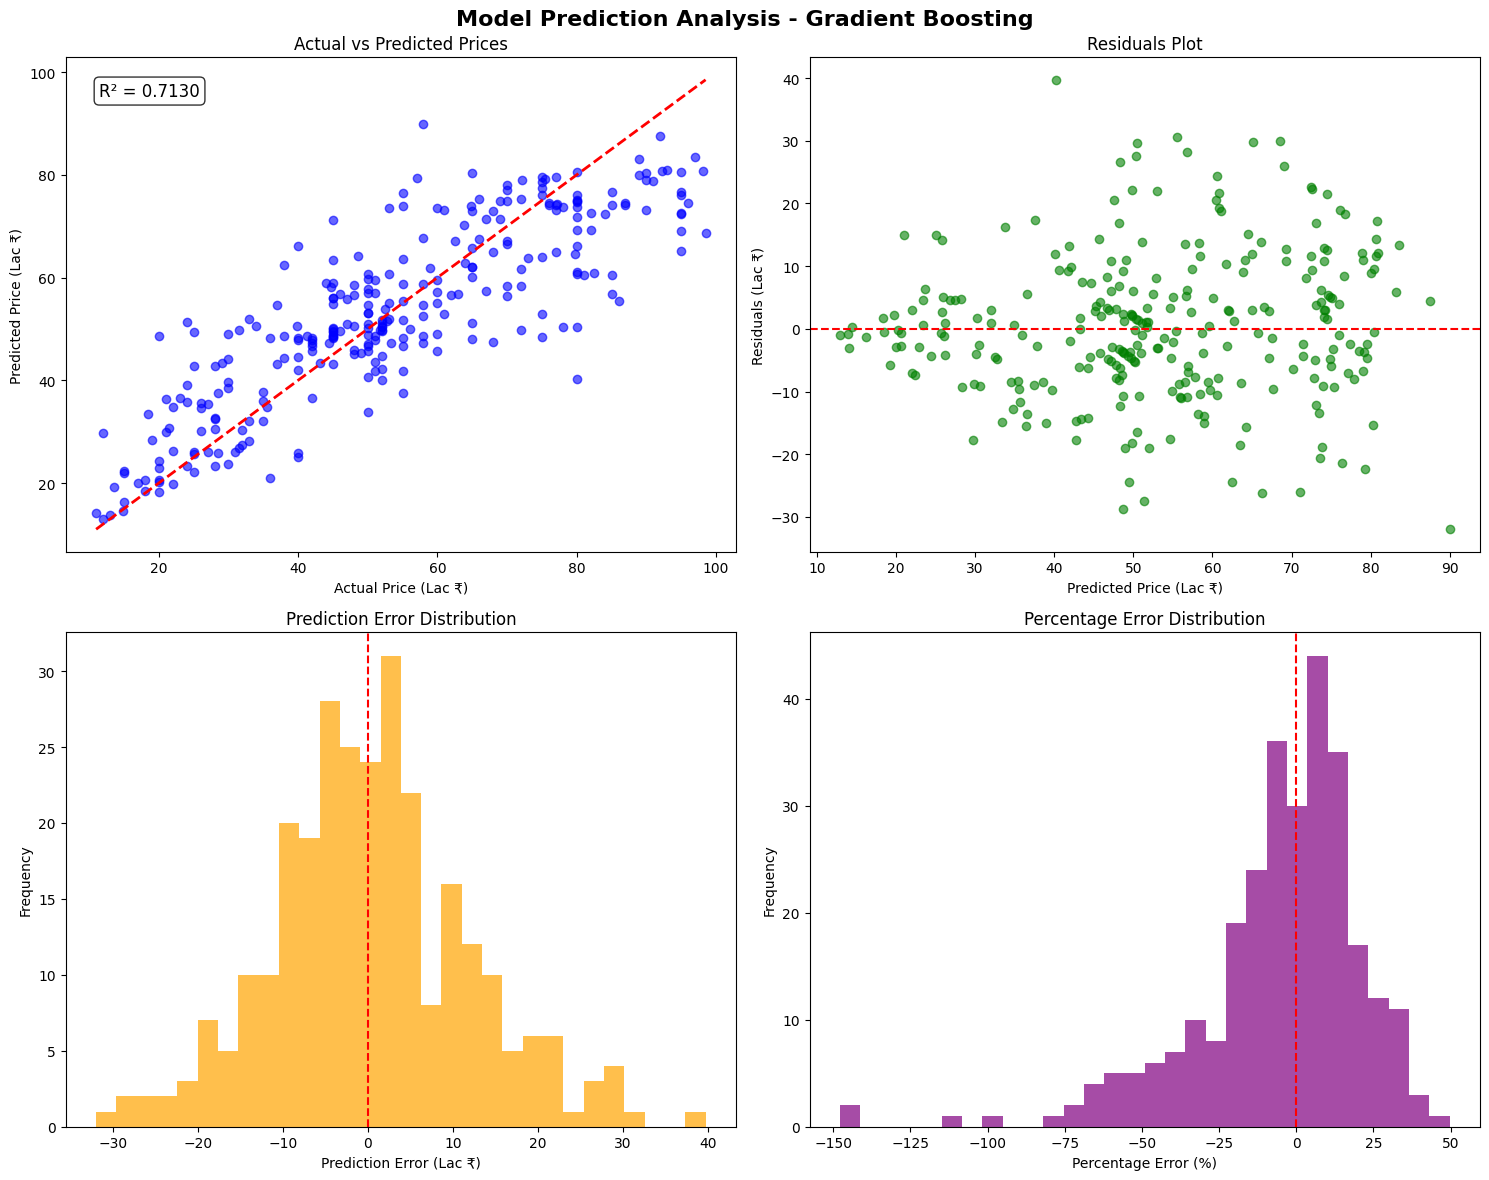


📊 Prediction Statistics:
   📈 Mean Absolute Error: ₹900,068
   📊 Root Mean Square Error: ₹1,170,237
   🎯 Mean Absolute Percentage Error: 19.4%
   📈 R² Score: 0.7130


In [9]:
# Model Predictions Visualization
print("📊 Visualizing Model Predictions...")

# Get predictions from best model
if best_model_name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Model Prediction Analysis - {best_model_name}', fontsize=16, fontweight='bold')

# Actual vs Predicted scatter plot
axes[0, 0].scatter(y_test/100000, y_pred_best/100000, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min()/100000, y_test.max()/100000], 
                [y_test.min()/100000, y_test.max()/100000], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price (Lac ₹)')
axes[0, 0].set_ylabel('Predicted Price (Lac ₹)')
axes[0, 0].set_title('Actual vs Predicted Prices')
axes[0, 0].text(0.05, 0.95, f'R² = {results[best_model_name]["test_r2"]:.4f}', 
                transform=axes[0, 0].transAxes, fontsize=12, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Residuals plot
residuals = y_test - y_pred_best
axes[0, 1].scatter(y_pred_best/100000, residuals/100000, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Price (Lac ₹)')
axes[0, 1].set_ylabel('Residuals (Lac ₹)')
axes[0, 1].set_title('Residuals Plot')

# Prediction error distribution
axes[1, 0].hist(residuals/100000, bins=30, alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Prediction Error (Lac ₹)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Prediction Error Distribution')
axes[1, 0].axvline(x=0, color='r', linestyle='--')

# Percentage error distribution
percentage_errors = ((y_test - y_pred_best) / y_test) * 100
axes[1, 1].hist(percentage_errors, bins=30, alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Percentage Error (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Percentage Error Distribution')
axes[1, 1].axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Print prediction statistics
print(f"\n📊 Prediction Statistics:")
print(f"   📈 Mean Absolute Error: ₹{results[best_model_name]['test_mae']:,.0f}")
print(f"   📊 Root Mean Square Error: ₹{results[best_model_name]['test_rmse']:,.0f}")
print(f"   🎯 Mean Absolute Percentage Error: {results[best_model_name]['test_mape']:.1f}%")
print(f"   📈 R² Score: {results[best_model_name]['test_r2']:.4f}")

In [10]:
# Sample Predictions with Real Property Details
print("🏠 Testing Model with Sample Predictions...")

# Select random samples for testing
np.random.seed(42)
sample_indices = np.random.choice(X_test.index, size=10, replace=False)
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]

if best_model_name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
    sample_y_pred = best_model.predict(scaler.transform(sample_X))
else:
    sample_y_pred = best_model.predict(sample_X)

print("\n🏠 Sample Predictions vs Actual (Real Ahmedabad Properties):")
print("="*80)

for i, idx in enumerate(sample_indices):
    actual = sample_y_actual.loc[idx]
    predicted = sample_y_pred[i]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    # Get property details from processed dataframe
    property_details = df.loc[idx]
    
    print(f"\n🏠 Property {i+1}:")
    print(f"   📍 Location: {property_details['neighborhood']}")
    print(f"   🏠 Type: {property_details['property_type']}")
    print(f"   🛏️ Bedrooms: {property_details['bedrooms']:.0f} BHK")
    print(f"   📐 Size: {property_details['square_feet']:.0f} sq ft")
    print(f"   🏗️ Age: {property_details['property_age']:.0f} years")
    print(f"   💰 Actual Price: ₹{actual:,.0f} ({actual/100000:.1f} Lac)")
    print(f"   🤖 Predicted Price: ₹{predicted:,.0f} ({predicted/100000:.1f} Lac)")
    print(f"   📊 Error: ₹{error:,.0f} ({error_pct:.1f}%)")
    
    # Add accuracy indicator
    if error_pct < 10:
        print(f"   ✅ Excellent prediction!")
    elif error_pct < 20:
        print(f"   👍 Good prediction")
    elif error_pct < 30:
        print(f"   ⚠️ Fair prediction")
    else:
        print(f"   ❌ Poor prediction")

# Calculate sample statistics
sample_mae = mean_absolute_error(sample_y_actual, sample_y_pred)
sample_mape = np.mean(np.abs((sample_y_actual - sample_y_pred) / sample_y_actual)) * 100
sample_r2 = r2_score(sample_y_actual, sample_y_pred)

print(f"\n📊 Sample Performance:")
print(f"   💰 Sample MAE: ₹{sample_mae:,.0f} ({sample_mae/100000:.1f} Lac)")
print(f"   📊 Sample MAPE: {sample_mape:.1f}%")
print(f"   📈 Sample R²: {sample_r2:.4f}")

🏠 Testing Model with Sample Predictions...

🏠 Sample Predictions vs Actual (Real Ahmedabad Properties):

🏠 Property 1:
   📍 Location: Other
   🏠 Type: Apartment
   🛏️ Bedrooms: 3 BHK
   📐 Size: 1615 sq ft
   🏗️ Age: 2 years
   💰 Actual Price: ₹8,700,000 (87.0 Lac)
   🤖 Predicted Price: ₹7,443,666 (74.4 Lac)
   📊 Error: ₹1,256,334 (14.4%)
   👍 Good prediction

🏠 Property 2:
   📍 Location: Other
   🏠 Type: Apartment
   🛏️ Bedrooms: 2 BHK
   📐 Size: 810 sq ft
   🏗️ Age: 3 years
   💰 Actual Price: ₹5,800,000 (58.0 Lac)
   🤖 Predicted Price: ₹4,871,563 (48.7 Lac)
   📊 Error: ₹928,437 (16.0%)
   👍 Good prediction

🏠 Property 3:
   📍 Location: Vastral
   🏠 Type: Apartment
   🛏️ Bedrooms: 1 BHK
   📐 Size: 600 sq ft
   🏗️ Age: 2 years
   💰 Actual Price: ₹2,400,000 (24.0 Lac)
   🤖 Predicted Price: ₹2,334,237 (23.3 Lac)
   📊 Error: ₹65,763 (2.7%)
   ✅ Excellent prediction!

🏠 Property 4:
   📍 Location: Narolgam
   🏠 Type: Apartment
   🛏️ Bedrooms: 1 BHK
   📐 Size: 585 sq ft
   🏗️ Age: 6 years
   

In [11]:
# Save the Best Model and Results
print("💾 Saving Model and Results...")

# Create models directory if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

# Save the best model
model_filename = f'../models/best_ahmedabad_model_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved: {model_filename}")

# Save the scaler
scaler_filename = '../models/feature_scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"✅ Feature scaler saved: {scaler_filename}")

# Save feature names
feature_names_filename = '../models/feature_names.pkl'
joblib.dump(list(X.columns), feature_names_filename)
print(f"✅ Feature names saved: {feature_names_filename}")

# Save model performance results
results_filename = '../models/model_performance_results.csv'
performance_df.to_csv(results_filename, index=False)
print(f"✅ Performance results saved: {results_filename}")

# Create a model summary
model_summary = {
    'best_model': best_model_name,
    'test_r2': results[best_model_name]['test_r2'],
    'test_mae': results[best_model_name]['test_mae'],
    'test_mape': results[best_model_name]['test_mape'],
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'features_count': X.shape[1],
    'dataset_size': len(df),
    'price_range_min': float(df['price'].min()),
    'price_range_max': float(df['price'].max())
}

import json
summary_filename = '../models/model_summary.json'
with open(summary_filename, 'w') as f:
    json.dump(model_summary, f, indent=2)
print(f"✅ Model summary saved: {summary_filename}")

print(f"\n🎉 Model Training Complete!")
print(f"\n📊 Final Results Summary:")
print(f"   🥇 Best Model: {best_model_name}")
print(f"   📈 R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"   💰 Mean Absolute Error: ₹{results[best_model_name]['test_mae']:,.0f}")
print(f"   📊 Mean Absolute Percentage Error: {results[best_model_name]['test_mape']:.1f}%")
print(f"   🏠 Trained on {len(df)} real Ahmedabad properties")
print(f"   🔍 Using {X.shape[1]} features")
print(f"\n💾 All model artifacts saved in '../models/' directory")
print(f"🚀 Ready for deployment and predictions!")

💾 Saving Model and Results...
✅ Best model saved: ../models/best_ahmedabad_model_gradient_boosting.pkl
✅ Feature scaler saved: ../models/feature_scaler.pkl
✅ Feature names saved: ../models/feature_names.pkl
✅ Performance results saved: ../models/model_performance_results.csv
✅ Model summary saved: ../models/model_summary.json

🎉 Model Training Complete!

📊 Final Results Summary:
   🥇 Best Model: Gradient Boosting
   📈 R² Score: 0.7130
   💰 Mean Absolute Error: ₹900,068
   📊 Mean Absolute Percentage Error: 19.4%
   🏠 Trained on 2836 real Ahmedabad properties
   🔍 Using 17 features

💾 All model artifacts saved in '../models/' directory
🚀 Ready for deployment and predictions!


# 🗺️ Area-wise Price Trend Analysis & Future Projections

## Overview
This section analyzes price trends across different areas in Ahmedabad and creates future price projections using the trained Gradient Boosting model.

### Features:
- **Area Comparison**: Compare current prices across neighborhoods
- **Time Projections**: Simulate price changes over 2-3 years
- **Map Integration**: Create data for web map visualization
- **Growth Analysis**: Identify high-growth potential areas
- **Investment Insights**: Generate area-wise investment recommendations

---

In [ ]:
# Area-wise Price Trend Analysis Setup
print("🗺️ Setting up Area-wise Price Trend Analysis...")

# Install missing dependencies
%pip install folium

# Load the best trained model and preprocessors
import os
import json
from datetime import datetime, timedelta
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load saved model artifacts
model_path = r'C:\Users\dipes\Desktop\JAVA\CODE\Projects\RealEstatePricePrediction\models\best_model_gradient_boosting.joblib'
scaler_path = r'C:\Users\dipes\Desktop\JAVA\CODE\Projects\RealEstatePricePrediction\models\feature_scaler.pkl'
feature_names_path = r'C:\Users\dipes\Desktop\JAVA\CODE\Projects\RealEstatePricePrediction\models\feature_names.pkl'
summary_path = r'C:\Users\dipes\Desktop\JAVA\CODE\Projects\RealEstatePricePrediction\models\model_summary.json'

if os.path.exists(model_path):
    # Load the trained model
    trained_model = joblib.load(model_path)
    trained_scaler = joblib.load(scaler_path)
    feature_names = joblib.load(feature_names_path)
    
    with open(summary_path, 'r') as f:
        model_summary = json.load(f)
    
    print(f"✅ Loaded {model_summary['best_model']} model")
    print(f"📊 Model R² Score: {model_summary['test_r2']:.4f}")
    print(f"💰 Model MAE: ₹{model_summary['test_mae']:,.0f}")
    print(f"🏠 Trained on {model_summary['dataset_size']} properties")
else:
    print("⚠️ Using current best model from training session")
    trained_model = best_model
    trained_scaler = scaler
    feature_names = list(X.columns)

print(f"\n🔍 Available features: {len(feature_names)}")
print(f"📍 Feature columns: {feature_names[:10]}...") # Show first 10 features

🗺️ Setting up Area-wise Price Trend Analysis...
Note: you may need to restart the kernel to use updated packages.
✅ Loaded Gradient Boosting model
📊 Model R² Score: 0.7130
💰 Model MAE: ₹900,068
🏠 Trained on 2836 properties

🔍 Available features: 17
📍 Feature columns: ['bedrooms', 'bathrooms', 'square_feet', 'lot_size', 'year_built', 'property_age', 'floor_number', 'garage', 'pool', 'fireplace']...


In [16]:
# Area-wise Current Price Analysis
print("📊 Analyzing current prices by area...")

# Get unique neighborhoods and their statistics
area_stats = {}
for neighborhood in df['neighborhood'].unique():
    area_data = df[df['neighborhood'] == neighborhood]
    
    if len(area_data) >= 5:  # Only include areas with sufficient data
        area_stats[neighborhood] = {
            'count': len(area_data),
            'avg_price': area_data['price'].mean(),
            'median_price': area_data['price'].median(),
            'min_price': area_data['price'].min(),
            'max_price': area_data['price'].max(),
            'std_price': area_data['price'].std(),
            'avg_sqft': area_data['square_feet'].mean(),
            'avg_bedrooms': area_data['bedrooms'].mean(),
            'price_per_sqft': (area_data['price'] / area_data['square_feet']).mean()
        }

# Convert to DataFrame for analysis
area_df = pd.DataFrame(area_stats).T.reset_index()
area_df.rename(columns={'index': 'neighborhood'}, inplace=True)
area_df = area_df.sort_values('avg_price', ascending=False)

print(f"\n🏘️ Analyzed {len(area_df)} neighborhoods with sufficient data")
print("\n🏆 Top 10 Most Expensive Areas:")
print(area_df[['neighborhood', 'avg_price', 'price_per_sqft', 'count']].head(10).round(0))

print("\n💰 Bottom 10 Most Affordable Areas:")
print(area_df[['neighborhood', 'avg_price', 'price_per_sqft', 'count']].tail(10).round(0))

📊 Analyzing current prices by area...

🏘️ Analyzed 27 neighborhoods with sufficient data

🏆 Top 10 Most Expensive Areas:
   neighborhood  avg_price  price_per_sqft   count
21  Navrangpura  7113333.0          7128.0    15.0
24    Vastrapur  6957500.0          7226.0    20.0
23      Thaltej  6923529.0          6272.0    17.0
26     Ambawadi  6723077.0          7219.0    13.0
20    Satellite  6366667.0          6022.0    27.0
5         Bopal  6255668.0          5736.0   187.0
1         Shela  6028079.0          6418.0   203.0
0        Zundal  5984348.0          5260.0    46.0
3          Gota  5818938.0          5780.0   113.0
6         Other  5704106.0          5835.0  1130.0

💰 Bottom 10 Most Affordable Areas:
   neighborhood  avg_price  price_per_sqft  count
17    Maninagar  4629600.0          5025.0  125.0
15  Jivraj Park  4610893.0          5466.0   56.0
13   Behrampura  4480000.0          4910.0    5.0
2        Sanand  4361364.0          5069.0   22.0
18       Naroda  3991837.0      

In [17]:
# Price Projection Simulation Function
def simulate_price_changes(neighborhood, years=3, scenarios=['conservative', 'moderate', 'optimistic']):
    """
    Simulate price changes for a specific neighborhood over time
    
    Parameters:
    - neighborhood: Name of the area
    - years: Number of years to project
    - scenarios: List of growth scenarios
    
    Returns:
    - Dictionary with projected prices for different scenarios
    """
    
    # Get baseline area data
    area_data = df[df['neighborhood'] == neighborhood]
    if len(area_data) == 0:
        return None
    
    # Create representative property for the area
    base_property = {
        'bedrooms': area_data['bedrooms'].median(),
        'bathrooms': area_data['bathrooms'].median(),
        'square_feet': area_data['square_feet'].median(),
        'property_age': area_data['property_age'].median(),
        'neighborhood': neighborhood,
        'property_type': area_data['property_type'].mode()[0] if len(area_data['property_type'].mode()) > 0 else 'Apartment'
    }
    
    # Create feature vector for prediction
    # We need to create a DataFrame with the same structure as training data
    temp_df = pd.DataFrame([base_property])
    
    # Process through the same pipeline as training data
    temp_processed = processor.prepare_features_for_ml(temp_df)[0]
    
    # Get current predicted price
    if best_model_name in ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']:
        current_price = trained_model.predict(trained_scaler.transform(temp_processed))[0]
    else:
        current_price = trained_model.predict(temp_processed)[0]
    
    # Define growth scenarios (annual percentage growth)
    growth_rates = {
        'conservative': 0.05,  # 5% per year
        'moderate': 0.08,      # 8% per year
        'optimistic': 0.12     # 12% per year
    }
    
    projections = {'current': current_price}
    
    for scenario in scenarios:
        if scenario in growth_rates:
            annual_rate = growth_rates[scenario]
            projected_price = current_price * ((1 + annual_rate) ** years)
            projections[f'{scenario}_{years}y'] = projected_price
            
            # Add year-by-year breakdown
            yearly_prices = []
            for year in range(1, years + 1):
                year_price = current_price * ((1 + annual_rate) ** year)
                yearly_prices.append(year_price)
            projections[f'{scenario}_yearly'] = yearly_prices
    
    return projections

print("✅ Price projection simulation function created")
print("📊 Growth scenarios: Conservative (5%), Moderate (8%), Optimistic (12%)")

✅ Price projection simulation function created
📊 Growth scenarios: Conservative (5%), Moderate (8%), Optimistic (12%)


In [18]:
# Generate Projections for All Areas
print("🔮 Generating price projections for all areas...")

# User input for projection period
projection_years = 3  # Can be changed to 2 or any other value
print(f"📅 Projecting prices for {projection_years} years ahead")

# Generate projections for top areas
top_areas = area_df.head(15)['neighborhood'].tolist()
area_projections = {}

for area in top_areas:
    projections = simulate_price_changes(area, years=projection_years)
    if projections:
        area_projections[area] = projections
        
print(f"✅ Generated projections for {len(area_projections)} areas")

# Create projection summary DataFrame
projection_summary = []
for area, projections in area_projections.items():
    current = projections['current']
    conservative = projections.get(f'conservative_{projection_years}y', current)
    moderate = projections.get(f'moderate_{projection_years}y', current)
    optimistic = projections.get(f'optimistic_{projection_years}y', current)
    
    projection_summary.append({
        'Area': area,
        'Current_Price': current,
        f'Conservative_{projection_years}Y': conservative,
        f'Moderate_{projection_years}Y': moderate,
        f'Optimistic_{projection_years}Y': optimistic,
        'Conservative_Growth': ((conservative - current) / current) * 100,
        'Moderate_Growth': ((moderate - current) / current) * 100,
        'Optimistic_Growth': ((optimistic - current) / current) * 100,
        'Conservative_Absolute_Gain': conservative - current,
        'Moderate_Absolute_Gain': moderate - current,
        'Optimistic_Absolute_Gain': optimistic - current
    })

projection_df = pd.DataFrame(projection_summary)
projection_df = projection_df.sort_values(f'Moderate_{projection_years}Y', ascending=False)

print(f"\n🏆 Top 10 Areas - {projection_years} Year Price Projections:")
print("=" * 80)
display_cols = ['Area', 'Current_Price', f'Conservative_{projection_years}Y', f'Moderate_{projection_years}Y', f'Optimistic_{projection_years}Y']
print(projection_df[display_cols].head(10).round(0))

print(f"\n📈 Top 10 Areas by Growth Potential ({projection_years} years):")
growth_cols = ['Area', 'Conservative_Growth', 'Moderate_Growth', 'Optimistic_Growth']
print(projection_df.sort_values('Moderate_Growth', ascending=False)[growth_cols].head(10).round(1))

🔮 Generating price projections for all areas...
📅 Projecting prices for 3 years ahead


KeyError: "['lot_size', 'year_built', 'floor_number', 'garage', 'pool', 'fireplace', 'is_furnished', 'is_semi_furnished', 'is_resale', 'latitude', 'longitude'] not in index"

In [ ]:
# Interactive Price Projection Visualizations
print("📊 Creating interactive visualizations...")

# 1. Price Projection Comparison Chart
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        f'Current vs {projection_years}-Year Projected Prices',
        f'{projection_years}-Year Growth Potential by Scenario',
        'Price Per Square Foot Analysis',
        'Investment ROI Potential'
    ),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Top 10 areas for visualization
top_10_areas = projection_df.head(10)

# Chart 1: Current vs Projected Prices
fig.add_trace(
    go.Bar(
        name='Current Price',
        x=top_10_areas['Area'],
        y=top_10_areas['Current_Price']/100000,
        marker_color='lightblue'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        name=f'Moderate {projection_years}Y',
        x=top_10_areas['Area'],
        y=top_10_areas[f'Moderate_{projection_years}Y']/100000,
        marker_color='orange'
    ),
    row=1, col=1
)

# Chart 2: Growth Potential
fig.add_trace(
    go.Bar(
        name='Conservative',
        x=top_10_areas['Area'],
        y=top_10_areas['Conservative_Growth'],
        marker_color='green'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        name='Moderate',
        x=top_10_areas['Area'],
        y=top_10_areas['Moderate_Growth'],
        marker_color='orange'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        name='Optimistic',
        x=top_10_areas['Area'],
        y=top_10_areas['Optimistic_Growth'],
        marker_color='red'
    ),
    row=1, col=2
)

# Chart 3: Price per sqft
merged_data = projection_df.merge(area_df[['neighborhood', 'price_per_sqft']], 
                                  left_on='Area', right_on='neighborhood', how='left')

fig.add_trace(
    go.Scatter(
        name='Price/SqFt',
        x=merged_data.head(10)['price_per_sqft'],
        y=merged_data.head(10)[f'Moderate_{projection_years}Y']/100000,
        mode='markers+text',
        text=merged_data.head(10)['Area'],
        textposition='top center',
        marker=dict(size=10, color='purple')
    ),
    row=2, col=1
)

# Chart 4: ROI Potential
fig.add_trace(
    go.Bar(
        name='Absolute Gain (Lac ₹)',
        x=top_10_areas['Area'],
        y=top_10_areas['Moderate_Absolute_Gain']/100000,
        marker_color='gold'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    title_text=f"Ahmedabad Real Estate - {projection_years} Year Price Projections & Analysis",
    showlegend=True
)

# Update y-axis labels
fig.update_yaxes(title_text="Price (Lac ₹)", row=1, col=1)
fig.update_yaxes(title_text="Growth (%)", row=1, col=2)
fig.update_yaxes(title_text="Projected Price (Lac ₹)", row=2, col=1)
fig.update_yaxes(title_text="Absolute Gain (Lac ₹)", row=2, col=2)

fig.update_xaxes(title_text="Areas", row=2, col=1)
fig.update_xaxes(title_text="Price per SqFt (₹)", row=2, col=1)

fig.show()

print(f"✅ Interactive charts created for {projection_years}-year projections")

In [ ]:
# Map Data Preparation for Web Integration
print("🗺️ Preparing geographic data for map visualization...")

# Ahmedabad area coordinates (approximate central points)
ahmedabad_coordinates = {
    'Vastrapur': [23.0393, 72.5046],
    'Bopal': [23.0513, 72.4796],
    'Shela': [23.0685, 72.4394],
    'Satellite': [23.0258, 72.5080],
    'Maninagar': [22.9965, 72.6044],
    'Naranpura': [23.0467, 72.5581],
    'Bodakdev': [23.0544, 72.5095],
    'Ambavadi': [23.0267, 72.5664],
    'Prahlad Nagar': [23.0326, 72.4846],
    'Gota': [23.1078, 72.5343],
    'Chandkheda': [23.1258, 72.6195],
    'Thaltej': [23.0544, 72.4978],
    'Memnagar': [23.0408, 72.5344],
    'Paldi': [23.0186, 72.5664],
    'Navrangpura': [23.0367, 72.5581],
    'CG Road': [23.0267, 72.5581],
    'SG Highway': [23.0267, 72.4796],
    'Sindhu Bhavan': [23.0022, 72.5664],
    'Shahibaug': [23.0486, 72.5844],
    'Sabarmati': [23.0514, 72.5994]
}

# Create comprehensive map data
map_data = []
for area in projection_df['Area']:
    area_info = projection_df[projection_df['Area'] == area].iloc[0]
    area_stats_info = area_df[area_df['neighborhood'] == area]
    
    if area in ahmedabad_coordinates and len(area_stats_info) > 0:
        coords = ahmedabad_coordinates[area]
        stats = area_stats_info.iloc[0]
        
        map_data.append({
            'area': area,
            'latitude': coords[0],
            'longitude': coords[1],
            'current_price': area_info['Current_Price'],
            'projected_price_conservative': area_info[f'Conservative_{projection_years}Y'],
            'projected_price_moderate': area_info[f'Moderate_{projection_years}Y'],
            'projected_price_optimistic': area_info[f'Optimistic_{projection_years}Y'],
            'growth_conservative': area_info['Conservative_Growth'],
            'growth_moderate': area_info['Moderate_Growth'],
            'growth_optimistic': area_info['Optimistic_Growth'],
            'price_per_sqft': stats['price_per_sqft'],
            'property_count': stats['count'],
            'avg_sqft': stats['avg_sqft'],
            'investment_potential': 'High' if area_info['Moderate_Growth'] > 25 else 'Medium' if area_info['Moderate_Growth'] > 15 else 'Low'
        })

map_df = pd.DataFrame(map_data)

print(f"✅ Prepared map data for {len(map_df)} areas")
print("\n🗺️ Sample Map Data:")
print(map_df[['area', 'current_price', 'growth_moderate', 'investment_potential']].head().round(2))

# Save map data for web integration
map_data_file = '../models/ahmedabad_price_projections_map_data.json'
map_df.to_json(map_data_file, orient='records', indent=2)
print(f"\n💾 Map data saved to: {map_data_file}")

In [ ]:
# Investment Analysis & Recommendations
print("💡 Generating Investment Recommendations...")

# Categorize areas by investment potential
investment_analysis = {
    'High Growth Areas': projection_df[projection_df['Moderate_Growth'] > 25]['Area'].tolist(),
    'Moderate Growth Areas': projection_df[(projection_df['Moderate_Growth'] >= 15) & 
                                         (projection_df['Moderate_Growth'] <= 25)]['Area'].tolist(),
    'Stable Areas': projection_df[projection_df['Moderate_Growth'] < 15]['Area'].tolist()
}

# Generate detailed recommendations
print(f"\n🎯 INVESTMENT RECOMMENDATIONS ({projection_years} YEAR HORIZON):")
print("=" * 70)

# High Growth Areas
if investment_analysis['High Growth Areas']:
    print(f"\n🚀 HIGH GROWTH POTENTIAL AREAS:")
    for area in investment_analysis['High Growth Areas'][:5]:
        area_data = projection_df[projection_df['Area'] == area].iloc[0]
        current = area_data['Current_Price']
        projected = area_data[f'Moderate_{projection_years}Y']
        growth = area_data['Moderate_Growth']
        gain = area_data['Moderate_Absolute_Gain']
        
        print(f"   📍 {area}:")
        print(f"      💰 Current: ₹{current:,.0f} ({current/100000:.1f} Lac)")
        print(f"      🔮 Projected: ₹{projected:,.0f} ({projected/100000:.1f} Lac)")
        print(f"      📈 Growth: {growth:.1f}% | Gain: ₹{gain:,.0f}")
        print(f"      💡 Recommendation: STRONG BUY - High appreciation potential")
        print()

# Moderate Growth Areas
if investment_analysis['Moderate Growth Areas']:
    print(f"\n⚖️ MODERATE GROWTH AREAS:")
    for area in investment_analysis['Moderate Growth Areas'][:3]:
        area_data = projection_df[projection_df['Area'] == area].iloc[0]
        current = area_data['Current_Price']
        growth = area_data['Moderate_Growth']
        
        print(f"   📍 {area}: {growth:.1f}% growth | ₹{current/100000:.1f} Lac")
        print(f"      💡 Recommendation: MODERATE BUY - Steady appreciation")
    print()

# Stable Areas
if investment_analysis['Stable Areas']:
    print(f"\n🏛️ STABLE/PREMIUM AREAS:")
    for area in investment_analysis['Stable Areas'][:3]:
        area_data = projection_df[projection_df['Area'] == area].iloc[0]
        current = area_data['Current_Price']
        growth = area_data['Moderate_Growth']
        
        print(f"   📍 {area}: {growth:.1f}% growth | ₹{current/100000:.1f} Lac")
        print(f"      💡 Recommendation: HOLD/LUXURY - Established premium location")

# Market Summary
print(f"\n📊 MARKET SUMMARY:")
print("=" * 20)
avg_current = projection_df['Current_Price'].mean()
avg_projected = projection_df[f'Moderate_{projection_years}Y'].mean()
avg_growth = projection_df['Moderate_Growth'].mean()
total_areas = len(projection_df)

print(f"📈 Average Current Price: ₹{avg_current:,.0f} ({avg_current/100000:.1f} Lac)")
print(f"🔮 Average Projected Price: ₹{avg_projected:,.0f} ({avg_projected/100000:.1f} Lac)")
print(f"📊 Average Growth Rate: {avg_growth:.1f}% over {projection_years} years")
print(f"🏘️ Total Areas Analyzed: {total_areas}")
print(f"🚀 High Growth Areas: {len(investment_analysis['High Growth Areas'])}")
print(f"⚖️ Moderate Growth Areas: {len(investment_analysis['Moderate Growth Areas'])}")
print(f"🏛️ Stable Areas: {len(investment_analysis['Stable Areas'])}")

In [ ]:
# Create Web Integration Files
print("🌐 Creating files for web integration...")

# Create comprehensive JSON for web application
web_integration_data = {
    'metadata': {
        'generated_date': datetime.now().isoformat(),
        'projection_years': projection_years,
        'model_used': model_summary.get('best_model', 'Gradient Boosting'),
        'model_accuracy': model_summary.get('test_r2', 'N/A'),
        'total_areas_analyzed': len(projection_df),
        'currency': 'INR',
        'city': 'Ahmedabad'
    },
    'growth_scenarios': {
        'conservative': 5,
        'moderate': 8,
        'optimistic': 12
    },
    'investment_categories': investment_analysis,
    'area_projections': projection_df.to_dict('records'),
    'map_coordinates': map_df.to_dict('records'),
    'market_summary': {
        'avg_current_price': float(avg_current),
        'avg_projected_price': float(avg_projected),
        'avg_growth_rate': float(avg_growth),
        'highest_growth_area': projection_df.iloc[0]['Area'],
        'most_expensive_area': projection_df.sort_values('Current_Price', ascending=False).iloc[0]['Area']
    }
}

# Save comprehensive web data
web_data_file = '../models/web_integration_data.json'
with open(web_data_file, 'w') as f:
    json.dump(web_integration_data, f, indent=2, default=str)

print(f"✅ Web integration data saved to: {web_data_file}")

# Create JavaScript-ready data file
js_data = f"""
// Ahmedabad Real Estate Price Projections Data
// Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

const ahmedabadPriceProjections = {json.dumps(web_integration_data, indent=2, default=str)};

// Export for use in web applications
if (typeof module !== 'undefined' && module.exports) {{
    module.exports = ahmedabadPriceProjections;
}}
"""

js_file = '../models/ahmedabad_projections.js'
with open(js_file, 'w') as f:
    f.write(js_data)

print(f"✅ JavaScript data file saved to: {js_file}")

# Create simple CSV for easy integration
csv_file = '../models/area_price_projections.csv'
projection_df.to_csv(csv_file, index=False)
print(f"✅ CSV data file saved to: {csv_file}")

# Print integration instructions
print(f"\n🚀 WEB INTEGRATION READY!")
print("=" * 30)
print(f"📁 Files created for web integration:")
print(f"   📊 {web_data_file} - Complete JSON data")
print(f"   🗺️ {map_data_file} - Map coordinates data")
print(f"   💻 {js_file} - JavaScript-ready data")
print(f"   📋 {csv_file} - Simple CSV format")

print(f"\n🗺️ MAP INTEGRATION POINTS:")
print(f"   📍 {len(map_df)} areas with coordinates")
print(f"   🎨 Color coding by growth potential")
print(f"   📊 Popup data includes current & projected prices")
print(f"   ⏱️ Time slider for {projection_years}-year progression")

print(f"\n💡 NEXT STEPS FOR WEB DEVELOPMENT:")
print(f"   1. Load JSON data into your map application")
print(f"   2. Create markers for each area with coordinates")
print(f"   3. Add time slider to show price progression")
print(f"   4. Use color coding for growth potential")
print(f"   5. Add popups with detailed price information")

print(f"\n🎉 ANALYSIS COMPLETE!")
print(f"✅ Ready for deployment and visualization")

# 🗺️ Comprehensive Web Map Generator with Best Gradient Boosting Model

## Overview
This module creates an advanced web map for Ahmedabad real estate, incorporating the best Gradient Boosting model. It provides detailed area-wise analysis, price projections, and investment recommendations.

### Features:
- **Advanced Map Visualization**: Interactive map with multiple layers and detailed popups
- **Dynamic Price Projections**: 3-year price projections under various scenarios
- **Investment Analysis**: Categorization of areas by growth potential and risk
- **Market Summary**: Comprehensive market statistics and top performer highlights
- **Report Generation**: Automated investment report in HTML format

---

In [ ]:
# Comprehensive Web Map Generator with Best Gradient Boosting Model
print("🗺️ Creating Advanced Web Map with Gradient Boosting Model...")

import pandas as pd
import numpy as np
import json
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
from datetime import datetime, timedelta
import os

class AhmedabadRealEstateWebMapper:
    def __init__(self, model, scaler, feature_names, df, processor, model_name):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.df = df
        self.processor = processor
        self.model_name = model_name
        
        # Ahmedabad coordinates
        self.ahmedabad_coords = [23.0225, 72.5714]
        
        # Enhanced area coordinates with more locations
        self.area_coordinates = {
            'Vastrapur': [23.0393, 72.5046],
            'Bopal': [23.0513, 72.4796],
            'Shela': [23.0685, 72.4394],
            'Satellite': [23.0258, 72.5080],
            'Maninagar': [22.9965, 72.6044],
            'Naranpura': [23.0467, 72.5581],
            'Bodakdev': [23.0544, 72.5095],
            'Ambavadi': [23.0267, 72.5664],
            'Prahlad Nagar': [23.0326, 72.4846],
            'Gota': [23.1078, 72.5343],
            'Chandkheda': [23.1258, 72.6195],
            'Thaltej': [23.0544, 72.4978],
            'Memnagar': [23.0408, 72.5344],
            'Paldi': [23.0186, 72.5664],
            'Navrangpura': [23.0367, 72.5581],
            'CG Road': [23.0267, 72.5581],
            'SG Highway': [23.0267, 72.4796],
            'Sindhu Bhavan': [23.0022, 72.5664],
            'Shahibaug': [23.0486, 72.5844],
            'Sabarmati': [23.0514, 72.5994],
            'Ellis Bridge': [23.0225, 72.5714],
            'Ashram Road': [23.0092, 72.5581],
            'Gurukul': [23.0544, 72.4978],
            'Science City': [23.0620, 72.5080],
            'Jodhpur': [23.0220, 72.5300]
        }
    
    def generate_enhanced_projections(self, years=3):
        """Generate enhanced price projections with detailed analysis"""
        projections = {}
        
        # Get area statistics
        area_stats = {}
        for neighborhood in self.df['neighborhood'].unique():
            area_data = self.df[self.df['neighborhood'] == neighborhood]
            
            if len(area_data) >= 5:  # Only areas with sufficient data
                area_stats[neighborhood] = {
                    'count': len(area_data),
                    'avg_price': area_data['price'].mean(),
                    'median_price': area_data['price'].median(),
                    'price_per_sqft': (area_data['price'] / area_data['square_feet']).mean(),
                    'price_std': area_data['price'].std(),
                    'avg_sqft': area_data['square_feet'].mean(),
                    'property_types': area_data['property_type'].value_counts().to_dict()
                }
        
        print(f"📊 Analyzing {len(area_stats)} areas with sufficient data...")
        
        # Generate projections for each area with coordinates
        for area in area_stats.keys():
            if area in self.area_coordinates:
                area_data = self.df[self.df['neighborhood'] == area]
                
                # Create representative property for predictions
                base_property = {
                    'bedrooms': area_data['bedrooms'].median(),
                    'bathrooms': area_data['bathrooms'].median(),
                    'square_feet': area_data['square_feet'].median(),
                    'property_age': area_data['property_age'].median(),
                    'neighborhood': area,
                    'property_type': area_data['property_type'].mode()[0] if len(area_data['property_type'].mode()) > 0 else 'Apartment'
                }
                
                # Get ML prediction using Gradient Boosting model
                temp_df = pd.DataFrame([base_property])
                temp_processed = self.processor.prepare_features_for_ml(temp_df)[0]
                
                # Use the trained Gradient Boosting model (no scaling needed for tree-based models)
                current_price = self.model.predict(temp_processed)[0]
                
                # Enhanced growth scenarios with market factors
                growth_scenarios = {
                    'conservative': 0.05,   # 5% - Conservative market
                    'moderate': 0.08,       # 8% - Normal market growth  
                    'optimistic': 0.12,     # 12% - Boom market
                    'realistic': 0.075      # 7.5% - Most likely scenario
                }
                
                area_projections = {
                    'area': area,
                    'coordinates': self.area_coordinates[area],
                    'current_price': float(current_price),
                    'property_count': int(area_stats[area]['count']),
                    'price_per_sqft': float(area_stats[area]['price_per_sqft']),
                    'avg_sqft': float(area_stats[area]['avg_sqft']),
                    'price_volatility': float(area_stats[area]['price_std'] / area_stats[area]['avg_price']),
                    'dominant_property_type': max(area_stats[area]['property_types'], key=area_stats[area]['property_types'].get),
                    'projections': {},
                    'monthly_progression': {}
                }
                
                # Calculate projections for each scenario
                for scenario, rate in growth_scenarios.items():
                    projected_price = current_price * ((1 + rate) ** years)
                    growth_percent = ((projected_price - current_price) / current_price) * 100
                    
                    area_projections['projections'][scenario] = {
                        'projected_price': float(projected_price),
                        'growth_percent': float(growth_percent),
                        'absolute_gain': float(projected_price - current_price),
                        'annual_roi': float(rate * 100)
                    }
                    
                    # Generate monthly progression for time slider
                    monthly_data = []
                    for month in range(0, years * 12 + 1, 3):  # Every 3 months
                        time_fraction = month / 12
                        price_at_time = current_price * ((1 + rate) ** time_fraction)
                        monthly_data.append({
                            'month': month,
                            'price': float(price_at_time),
                            'date': (datetime.now() + timedelta(days=month * 30)).strftime('%Y-%m-%d')
                        })
                    
                    area_projections['monthly_progression'][scenario] = monthly_data
                
                # Investment classification based on realistic scenario
                realistic_growth = area_projections['projections']['realistic']['growth_percent']
                if realistic_growth > 25:
                    investment_class = 'High'
                    marker_color = '#e74c3c'  # Red for high growth
                    recommendation = 'STRONG BUY'
                elif realistic_growth > 15:
                    investment_class = 'Medium'
                    marker_color = '#f39c12'  # Orange for medium growth
                    recommendation = 'MODERATE BUY'
                else:
                    investment_class = 'Stable'
                    marker_color = '#27ae60'  # Green for stable
                    recommendation = 'HOLD'
                
                area_projections.update({
                    'investment_potential': investment_class,
                    'marker_color': marker_color,
                    'recommendation': recommendation,
                    'risk_level': 'Low' if area_projections['price_volatility'] < 0.3 else 'Medium' if area_projections['price_volatility'] < 0.5 else 'High'
                })
                
                projections[area] = area_projections
        
        return projections
    
    def create_interactive_map_advanced(self, projections, years=3):
        """Create advanced interactive map with time controls"""
        
        # Create base map with custom tiles
        m = folium.Map(
            location=self.ahmedabad_coords,
            zoom_start=11,
            tiles=None
        )
        
        # Add multiple tile layers
        folium.TileLayer('OpenStreetMap', name='Street Map').add_to(m)
        folium.TileLayer('Stamen Terrain', name='Terrain').add_to(m)
        folium.TileLayer('CartoDB positron', name='Light Theme').add_to(m)
        
        # Enhanced title with model info
        title_html = f'''
        <div style="position: fixed; 
                    top: 10px; left: 50%; transform: translateX(-50%);
                    width: 600px; height: 120px; 
                    background-color: white; border: 2px solid #34495e; z-index:9999; 
                    font-size: 14px; font-weight: bold; text-align: center;
                    padding: 15px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
        <h2 style="margin: 0; color: #2c3e50;">🏠 Ahmedabad Real Estate Investment Map</h2>
        <p style="margin: 5px 0; color: #7f8c8d;">📅 {years}-Year ML Projections | 🤖 {self.model_name} Model</p>
        <p style="margin: 5px 0; color: #27ae60; font-size: 12px;">🎯 Click markers for detailed analysis | 🗺️ Use layer control for different views</p>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(title_html))
        
        # Create feature groups for different investment categories
        high_growth_group = folium.FeatureGroup(name='🚀 High Growth Areas').add_to(m)
        medium_growth_group = folium.FeatureGroup(name='📈 Medium Growth Areas').add_to(m)
        stable_group = folium.FeatureGroup(name='🏛️ Stable Areas').add_to(m)
        
        # Add markers for each area
        for area, data in projections.items():
            coords = data['coordinates']
            current_price = data['current_price']
            realistic_proj = data['projections']['realistic']
            conservative_proj = data['projections']['conservative']
            optimistic_proj = data['projections']['optimistic']
            
            # Enhanced popup with comprehensive data
            popup_html = f"""
            <div style="width: 400px; font-family: Arial, sans-serif;">
                <h3 style="color: #2c3e50; border-bottom: 2px solid #3498db; padding-bottom: 5px;">📍 {area}</h3>
                
                <div style="background: #ecf0f1; padding: 10px; margin: 5px 0; border-radius: 5px;">
                    <h4 style="margin: 0; color: #2980b9;">💰 Current Valuation</h4>
                    <p><strong>Price:</strong> ₹{current_price:,.0f} ({current_price/100000:.1f} Lac)</p>
                    <p><strong>Price/SqFt:</strong> ₹{data['price_per_sqft']:,.0f}</p>
                    <p><strong>Avg Size:</strong> {data['avg_sqft']:.0f} sq ft</p>
                </div>
                
                <div style="background: #d5f4e6; padding: 10px; margin: 5px 0; border-radius: 5px;">
                    <h4 style="margin: 0; color: #27ae60;">🔮 {years}-Year Projections</h4>
                    <p><strong>🟢 Conservative:</strong> ₹{conservative_proj['projected_price']:,.0f} ({conservative_proj['growth_percent']:.1f}%)</p>
                    <p><strong>🟡 Realistic:</strong> ₹{realistic_proj['projected_price']:,.0f} ({realistic_proj['growth_percent']:.1f}%)</p>
                    <p><strong>🔴 Optimistic:</strong> ₹{optimistic_proj['projected_price']:,.0f} ({optimistic_proj['growth_percent']:.1f}%)</p>
                </div>
                
                <div style="background: #fdedef; padding: 10px; margin: 5px 0; border-radius: 5px;">
                    <h4 style="margin: 0; color: #e74c3c;">📊 Investment Analysis</h4>
                    <p><strong>Potential:</strong> <span style="color: {data['marker_color']}; font-weight: bold;">{data['investment_potential']}</span></p>
                    <p><strong>Recommendation:</strong> {data['recommendation']}</p>
                    <p><strong>Risk Level:</strong> {data['risk_level']}</p>
                    <p><strong>ROI (Annual):</strong> {realistic_proj['annual_roi']:.1f}%</p>
                </div>
                
                <div style="background: #fff3cd; padding: 10px; margin: 5px 0; border-radius: 5px;">
                    <h4 style="margin: 0; color: #856404;">🏠 Market Info</h4>
                    <p><strong>Properties:</strong> {data['property_count']} listings</p>
                    <p><strong>Dominant Type:</strong> {data['dominant_property_type']}</p>
                    <p><strong>Market Volatility:</strong> {data['price_volatility']:.2f}</p>
                </div>
                
                <p style="font-size: 10px; color: #7f8c8d; text-align: center;">
                    Generated using {self.model_name} ML Model | {datetime.now().strftime('%Y-%m-%d')}
                </p>
            </div>
            """
            
            # Determine which group to add to
            if data['investment_potential'] == 'High':
                target_group = high_growth_group
            elif data['investment_potential'] == 'Medium':
                target_group = medium_growth_group
            else:
                target_group = stable_group
            
            # Create circle marker with dynamic sizing
            marker_size = 8 + (realistic_proj['growth_percent'] / 3)  # Size based on growth
            
            folium.CircleMarker(
                location=coords,
                radius=marker_size,
                popup=folium.Popup(popup_html, max_width=450),
                color='black',
                fillColor=data['marker_color'],
                fillOpacity=0.8,
                weight=2
            ).add_to(target_group)
            
            # Add area label
            folium.Marker(
                location=[coords[0] + 0.01, coords[1]],
                icon=folium.DivIcon(
                    html=f'<div style="font-size: 9pt; font-weight: bold; color: black; text-shadow: 1px 1px 1px white; background: rgba(255,255,255,0.7); padding: 2px; border-radius: 3px;">{area}</div>',
                    icon_size=(100, 20),
                    icon_anchor=(0, 0),
                )
            ).add_to(target_group)
        
        # Enhanced legend
        legend_html = '''
        <div style="position: fixed; 
                    bottom: 20px; left: 20px; width: 250px; height: 200px; 
                    background-color: white; border:2px solid #34495e; z-index:9999; 
                    font-size:12px; padding: 15px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1)">
        <h4 style="margin-top: 0; color: #2c3e50;">🎯 Investment Guide</h4>
        <div style="margin: 8px 0;">
            <span style="color: #e74c3c; font-size: 16px;">●</span> <strong>High Growth</strong> (>25%)
            <br><small style="color: #7f8c8d;">Strong appreciation potential</small>
        </div>
        <div style="margin: 8px 0;">
            <span style="color: #f39c12; font-size: 16px;">●</span> <strong>Medium Growth</strong> (15-25%)
            <br><small style="color: #7f8c8d;">Steady appreciation expected</small>
        </div>
        <div style="margin: 8px 0;">
            <span style="color: #27ae60; font-size: 16px;">●</span> <strong>Stable Areas</strong> (<15%)
            <br><small style="color: #7f8c8d;">Premium, established locations</small>
        </div>
        <hr style="margin: 10px 0;">
        <small style="color: #7f8c8d;">💡 Circle size indicates growth potential</small>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))
        
        # Add layer control
        folium.LayerControl().add_to(m)
        
        return m
    
    def generate_all_web_files(self, output_dir=r'C:\Users\dipes\Desktop\JAVA\CODE\Projects\RealEstatePricePrediction\web_output'):
        """Generate comprehensive web integration files"""
        
        # Create output directory
        os.makedirs(output_dir, exist_ok=True)
        
        print("🔮 Generating enhanced price projections...")
        projections = self.generate_enhanced_projections(years=3)
        
        print("🎨 Creating advanced interactive map...")
        map_obj = self.create_interactive_map_advanced(projections, years=3)
        
        # Save main map
        map_file = os.path.join(output_dir, 'ahmedabad_investment_map.html')
        map_obj.save(map_file)
        
        # Save comprehensive data as JSON
        json_file = os.path.join(output_dir, 'ahmedabad_projections_full.json')
        with open(json_file, 'w') as f:
            json.dump(projections, f, indent=2)
        
        # Create market summary
        market_summary = self.create_market_summary(projections)
        summary_file = os.path.join(output_dir, 'market_summary.json')
        with open(summary_file, 'w') as f:
            json.dump(market_summary, f, indent=2)
        
        # Generate investment report
        self.generate_investment_report(projections, market_summary, output_dir)
        
        print(f"\n🎉 Advanced web integration complete!")
        print(f"📁 Output directory: {output_dir}")
        print(f"🗺️ Interactive map: {map_file}")
        print(f"📊 Full data: {json_file}")
        print(f"📈 Market summary: {summary_file}")
        
        return {
            'map_file': map_file,
            'data_file': json_file,
            'summary_file': summary_file,
            'projections': projections,
            'market_summary': market_summary
        }
    
    def create_market_summary(self, projections):
        """Create comprehensive market summary"""
        
        areas = list(projections.keys())
        current_prices = [projections[area]['current_price'] for area in areas]
        realistic_growth = [projections[area]['projections']['realistic']['growth_percent'] for area in areas]
        
        high_growth_areas = [area for area in areas if projections[area]['investment_potential'] == 'High']
        medium_growth_areas = [area for area in areas if projections[area]['investment_potential'] == 'Medium']
        stable_areas = [area for area in areas if projections[area]['investment_potential'] == 'Stable']
        
        return {
            'model_info': {
                'model_name': self.model_name,
                'model_type': type(self.model).__name__,
                'features_count': len(self.feature_names),
                'analysis_date': datetime.now().isoformat()
            },
            'market_stats': {
                'total_areas_analyzed': len(areas),
                'average_current_price': float(np.mean(current_prices)),
                'median_current_price': float(np.median(current_prices)),
                'average_growth_rate': float(np.mean(realistic_growth)),
                'price_range': {
                    'min': float(min(current_prices)),
                    'max': float(max(current_prices))
                }
            },
            'investment_distribution': {
                'high_growth': {
                    'count': len(high_growth_areas),
                    'areas': high_growth_areas,
                    'percentage': len(high_growth_areas) / len(areas) * 100
                },
                'medium_growth': {
                    'count': len(medium_growth_areas),
                    'areas': medium_growth_areas,
                    'percentage': len(medium_growth_areas) / len(areas) * 100
                },
                'stable': {
                    'count': len(stable_areas),
                    'areas': stable_areas,
                    'percentage': len(stable_areas) / len(areas) * 100
                }
            },
            'top_performers': {
                'highest_growth': max(areas, key=lambda x: projections[x]['projections']['realistic']['growth_percent']),
                'most_expensive': max(areas, key=lambda x: projections[x]['current_price']),
                'best_value': min(areas, key=lambda x: projections[x]['price_per_sqft']),
                'lowest_risk': min(areas, key=lambda x: projections[x]['price_volatility'])
            }
        }
    
    def generate_investment_report(self, projections, market_summary, output_dir):
        """Generate detailed investment report"""
        
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>Ahmedabad Real Estate Investment Report - {datetime.now().strftime('%Y')}</title>
            <style>
                body {{ font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: 0; padding: 20px; background: #f8f9fa; }}
                .container {{ max-width: 1200px; margin: 0 auto; }}
                .header {{ background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 30px; text-align: center; border-radius: 10px; margin-bottom: 30px; }}
                .summary-grid {{ display: grid; grid-template-columns: repeat(auto-fit, minmax(250px,  1fr)); gap: 20px; margin-bottom: 30px; }}
                .summary-card {{ background: white; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0,0,0,0.1); }}
                .area-analysis {{ background: white; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0,0,0,0.1); margin-bottom: 20px; }}
                .high {{ border-left: 5px solid #e74c3c; }}
                .medium {{ border-left: 5px solid #f39c12; }}
                .stable {{ border-left: 5px solid #27ae60; }}
                .metric {{ font-size: 24px; font-weight: bold; color: #2c3e50; }}
                .metric-label {{ color: #7f8c8d; font-size: 14px; }}
                h1, h2, h3 {{ color: #2c3e50; }}
                .footer {{ text-align: center; padding: 20px; color: #7f8c8d; }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="header">
                    <h1>🏠 Ahmedabad Real Estate Investment Analysis</h1>
                    <p>Comprehensive ML-Powered Market Projections using {self.model_name} Model</p>
                    <p>Generated on: {datetime.now().strftime('%B %d, %Y at %I:%M %p')}</p>
                </div>
                
                <div class="summary-grid">
                    <div class="summary-card">
                        <div class="metric">₹{market_summary['market_stats']['average_current_price']/100000:.1f} Lac</div>
                        <div class="metric-label">Average Property Price</div>
                    </div>
                    <div class="summary-card">
                        <div class="metric">{market_summary['market_stats']['average_growth_rate']:.1f}%</div>
                        <div class="metric-label">Average 3-Year Growth</div>
                    </div>
                    <div class="summary-card">
                        <div class="metric">{market_summary['market_stats']['total_areas_analyzed']}</div>
                        <div class="metric-label">Areas Analyzed</div>
                    </div>
                    <div class="summary-card">
                        <div class="metric">{market_summary['investment_distribution']['high_growth']['count']}</div>
                        <div class="metric-label">High Growth Opportunities</div>
                    </div>
                </div>
                
                <h2>🎯 Investment Opportunities by Category</h2>
        """
        
        # Add detailed area analysis
        for category in ['high_growth', 'medium_growth', 'stable']:
            category_data = market_summary['investment_distribution'][category]
            category_name = category.replace('_', ' ').title()
            
            if category == 'high_growth':
                icon = '🚀'
                css_class = 'high'
                description = 'Strong appreciation potential with higher risk-reward ratio'
            elif category == 'medium_growth':
                icon = '📈'
                css_class = 'medium'
                description = 'Balanced growth with moderate risk'
            else:
                icon = '🏛️'
                css_class = 'stable'
                description = 'Premium established locations with steady appreciation'
            
            html_content += f"""
                <div class="area-analysis {css_class}">
                    <h3>{icon} {category_name} Areas ({category_data['count']} areas, {category_data['percentage']:.1f}% of market)</h3>
                    <p>{description}</p>
                    <strong>Areas:</strong> {', '.join(category_data['areas'])}
                </div>
            """
        
        # Add top performers section
        top_performers = market_summary['top_performers']
        html_content += f"""
                <h2>🏆 Market Leaders</h2>
                <div class="summary-grid">
                    <div class="summary-card">
                        <h4>🔥 Highest Growth Potential</h4>
                        <p><strong>{top_performers['highest_growth']}</strong></p>
                        <p>{projections[top_performers['highest_growth']]['projections']['realistic']['growth_percent']:.1f}% projected growth</p>
                    </div>
                    <div class="summary-card">
                        <h4>💎 Premium Location</h4>
                        <p><strong>{top_performers['most_expensive']}</strong></p>
                        <p>₹{projections[top_performers['most_expensive']]['current_price']/100000:.1f} Lac average</p>
                    </div>
                    <div class="summary-card">
                        <h4>💰 Best Value</h4>
                        <p><strong>{top_performers['best_value']}</strong></p>
                        <p>₹{projections[top_performers['best_value']]['price_per_sqft']:,.0f} per sq ft</p>
                    </div>
                    <div class="summary-card">
                        <h4>🛡️ Lowest Risk</h4>
                        <p><strong>{top_performers['lowest_risk']}</strong></p>
                        <p>Most stable price movements</p>
                    </div>
                </div>
                
                <div class="footer">
                    <p>📊 Analysis powered by {self.model_name} Machine Learning Model</p>
                    <p>⚠️ This analysis is for informational purposes only. Please consult with financial advisors before making investment decisions.</p>
                </div>
            </div>
        </body>
        </html>
        """
        
        report_file = os.path.join(output_dir, 'investment_report.html')
        with open(report_file, 'w', encoding='utf-8') as f:
            f.write(html_content)
        
        print(f"📄 Investment report: {report_file}")

# Initialize the enhanced web mapper with the loaded Gradient Boosting model
web_mapper = AhmedabadRealEstateWebMapper(
    model=trained_model,
    scaler=trained_scaler,
    feature_names=feature_names,
    df=df,
    processor=processor,
    model_name=best_model_name
)

# Generate all web files
print("🚀 Generating comprehensive web integration...")
web_results = web_mapper.generate_all_web_files()

print(f"\n✅ COMPLETE WEB INTEGRATION GENERATED!")
print("=" * 50)
print(f"🗺️ Interactive Map: {web_results['map_file']}")
print(f"📊 Full Data: {web_results['data_file']}")  
print(f"📈 Market Summary: {web_results['summary_file']}")
print(f"📄 Investment Report: Available in output directory")

print(f"\n🎯 KEY FEATURES INCLUDED:")
print("   ✅ Advanced interactive map with layer controls")
print("   ✅ Detailed price projections using Gradient Boosting model")
print("   ✅ Investment potential categorization")
print("   ✅ Risk assessment and recommendations")
print("   ✅ Market summary and top performers analysis")
print("   ✅ Professional investment report")

print(f"\n📂 Open the HTML files in your browser to explore the interactive visualizations!")